In [1]:
# Full raw data file found at https://open.toronto.ca/dataset/reducing-single-use-and-takeaway-items/ as "Reducing Single Use and Takeaway Items - Consultation 1.xlsx"
# Raw data file uploaded as a truncated .csv of full .xlsx containing only identifier columns and response to the question:  "4. How likely would you be to use an alternative reusable item instead of the disposable option?"

# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import data csv into a pandas dataframe
vis2_filepath = "C:/Users/Karen/Desktop/DSI/visualization/02_activities/assignments/assignment_3/toronto-beaches-water-quality - 4326.csv"
raw_df = pd.read_csv(vis2_filepath)


In [57]:
# Process raw data into a pandas dataframe for plotting

# select only beach name, collection date, and eColi reading columns for further data processing and plotting
processed_df = raw_df[['beachName', 'collectionDate', 'eColi']]

# change NaN values to 0; NaN values only found in eColi column, indicating that 0 E coli bacterium were found
processed_df = processed_df.fillna(0)

# compute sum of E coli counts for duplicate entries by beachName and collectionDate
# - there should be 4 entries per beachName+collectionDate pair, as 4 sites were sampled for eColi (data in raw unprocessed file)
processed_df.groupby(['beachName', 'collectionDate']).sum().reset_index()

# extract year and month+day data from collectionDate column
processed_df['collectionDate'] = pd.to_datetime(processed_df['collectionDate']) # convert collectionDate column into datetime format for further processing
processed_df['year'] = processed_df['collectionDate'].dt.year
processed_df['month'] = processed_df['collectionDate'].dt.month
processed_df['day'] = processed_df['collectionDate'].dt.day
processed_df['month-day'] = processed_df['collectionDate'].dt.month.apply(lambda x: '{:02d}'.format(x)).str.cat(processed_df['collectionDate'].dt.day.apply(lambda x: '{:02d}'.format(x)), sep='-') # combine extracted month and day back into 'MM-DD' format 

# only keep data for July between years 2020-2024
processed_df = processed_df[(processed_df['month'] == 7) & 
                            (processed_df['year'] <= 2024) & 
                            (processed_df['year'] >= 2020)]

processed_df

,beachName,collectionDate,eColi,year,month,day,month-day
468,Marie Curtis Park East Beach,2024-07-31,180.0,2024,7,31,07-31
469,Marie Curtis Park East Beach,2024-07-31,210.0,2024,7,31,07-31
470,Marie Curtis Park East Beach,2024-07-31,170.0,2024,7,31,07-31
471,Marie Curtis Park East Beach,2024-07-31,350.0,2024,7,31,07-31
472,Marie Curtis Park East Beach,2024-07-31,330.0,2024,7,31,07-31
...,...,...,...,...,...,...,...
6067,Sunnyside Beach,2020-07-01,10.0,2020,7,1,07-01
6068,Sunnyside Beach,2020-07-01,30.0,2020,7,1,07-01
6069,Sunnyside Beach,2020-07-01,10.0,2020,7,1,07-01
6070,Sunnyside Beach,2020-07-01,40.0,2020,7,1,07-01


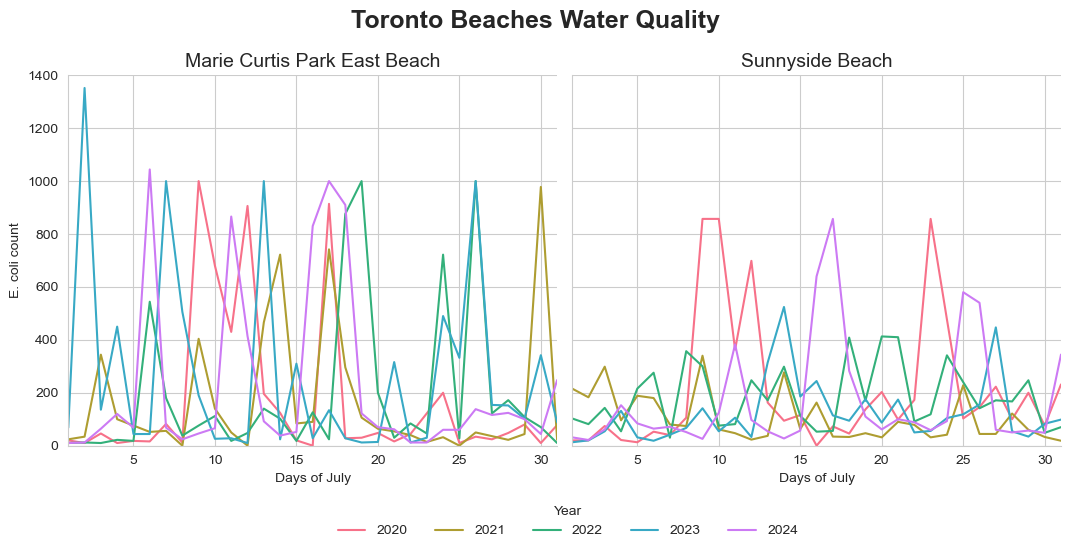

In [167]:
# create multiple line graphs on the same axes with seaborn

# initiate figure
#fig = plt.subplots(figsize=(10,5))

sns.set_style('whitegrid')

df_graph = sns.relplot(data = processed_df, 
                        x='day', y='eColi', 
                        #style = 'beachName', 
                        hue = 'year',
                        palette = sns.color_palette("husl", len(processed_df['year'].unique())), # from colormap gradient, choose num of colours equivalent to the unique num of years in dataset
                        col = 'beachName', # facet graphs by beach, since having so many lines on 1 graph is visually overwhelming
                        col_wrap = 2, # 1 subplot per column, i.e. vertically stacked
                        kind = 'line',
                        errorbar = None, # remove confidence interval shading by hue (group)
                        )

# limit x axis range to days of the month (1-31)
plt.xlim(1, 31)

# limit y axis range to min and max eColi values
plt.ylim(0, 1400)

# set global title
df_graph.fig.suptitle('Toronto Beaches Water Quality', fontweight= 'bold', fontsize = 18)

# set subplot titles
df_graph.axes[0].set_title('Marie Curtis Park East Beach', fontsize = 14)
df_graph.axes[1].set_title('Sunnyside Beach', fontsize = 14)

# set axes labels
df_graph.set(xlabel = 'Days of July',
             ylabel = 'E. coli count',)

sns.move_legend(df_graph, 
                loc = 'lower center', 
                bbox_to_anchor=(0.53, -0.1), 
                ncol=5, 
                title='Year',
                frameon=False)

plt.tight_layout()

# export viz
#plt.savefig("vis2.png", dpi = 300, bbox_inches='tight')

plt.show()
